In [1]:
from fastai.vision.all import *

In [2]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [3]:
dls = data.dataloaders('C:/Users/55449/Documents/GitHub/Arquivos/projeto/imagens')

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)


C:\Users\55449\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\55449\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
learn.fit_one_cycle(1)


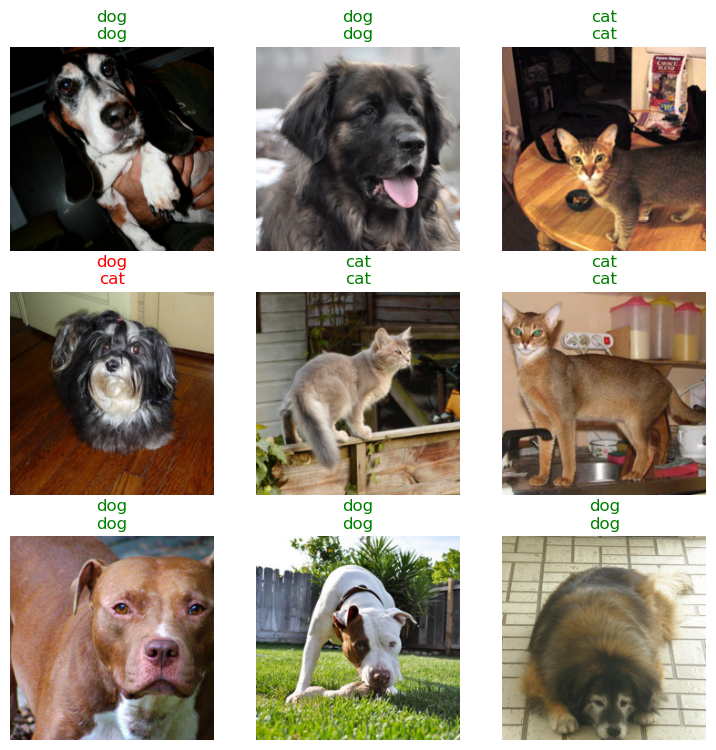

In [6]:
learn.show_results()

In [7]:
img = PILImage.create('american_bulldog_185.jpg')

In [8]:
pred, pred_idx, probs = learn.predict(img)

In [9]:
print(f'Previsão: {pred}; Probabilidades: {probs}')

Previsão: dog; Probabilidades: tensor([0.0026, 0.9974])


In [10]:
import datetime
from dash import Dash, dcc, html
from dash.dependencies import Input, Output, State

In [11]:

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

In [12]:

app.layout = html.Div([
    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        # Allow multiple files to be uploaded
        multiple=True
    ),
    html.Div(id='output-image-upload'),
])

def parse_contents(contents, filename, date):
    return html.Div([
        html.H5(filename),
        html.H6(datetime.datetime.fromtimestamp(date)),

        # HTML images accept base64 encoded strings in the same format
        # that is supplied by the upload
        html.Img(src=contents),
        html.Hr(),
        html.Div('Raw Content'),
        html.Pre(contents[0:200] + '...', style={
            'whiteSpace': 'pre-wrap',
            'wordBreak': 'break-all'
        })
    ])

@app.callback(Output('output-image-upload', 'children'),
              Input('upload-image', 'contents'),
              State('upload-image', 'filename'),
              State('upload-image', 'last_modified'))
def update_output(list_of_contents, list_of_names, list_of_dates):
    if list_of_contents is not None:
        children = [
            parse_contents(c, n, d) for c, n, d in
            zip(list_of_contents, list_of_names, list_of_dates)]
        return children

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


SystemExit: 1

C:\Users\55449\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
